In [2]:
%load_ext autoreload
%autoreload 2

import pymc3 as pm
import numpy as np
import math as m
import matplotlib.pyplot as plt
import dive 
import deerlab as dl
from scipy.io import loadmat

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Load and display data

In [4]:
loaded_data = np.genfromtxt("../../data/3992_good.dat", skip_header = 1, delimiter = ',')
Pid = 3992
t = loaded_data[:,0]
Vexp = loaded_data[:,1]

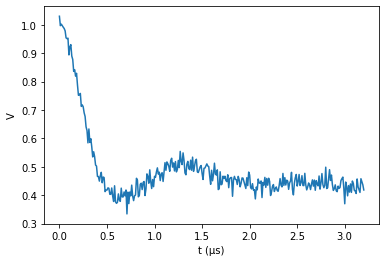

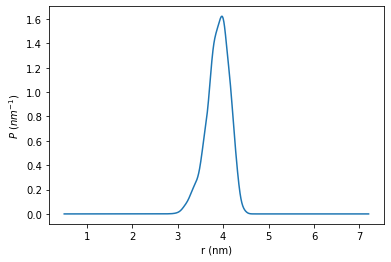

In [5]:
plt.plot(t, Vexp)
plt.xlabel('t (µs)')
plt.ylabel('V')
plt.show()

P0s = loadmat('..\..\data\edwards_testset\distributions_2LZM.mat')['P0']
rref = np.squeeze(loadmat('..\..\data\edwards_testset\distributions_2LZM.mat')['r0'])
Pref = P0s[Pid-1,:]

plt.plot(rref, Pref)
plt.xlabel('r (nm)')
plt.ylabel(r'$P~(nm^{-1})$')
plt.show()



## deerlab

In [10]:
r_dl = np.linspace(2,6,200)

fit = dl.fitmodel(Vexp,t,r_dl,'P',dl.bg_exp,dl.ex_4pdeer,verbose=True)
fit.plot();

print('lg(α) = ' + str(round(np.log10(fit.regparam),2)))

## Initial Regularization

In [4]:
pars = {"method": 'regularization', "r": np.linspace(2,6,200)}

model = dive.model(t, Vexp, pars)

MCMCparameters = {"draws": 2000,"tune": 500, "chains": 4, 'cores': 4}
trace = dive.sample(model,MCMCparameters)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>SamplePfromV: [P]
>randTau: [tau]
>randDelta: [delta]
>NUTS: [k, V0, lamb]


Sampling 4 chains for 500 tune and 2_000 draw iterations (2_000 + 8_000 draws total) took 577 seconds.
WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
The acceptance probability does not match the target. It is 0.900659993620393, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 10% for some parameters.


mean        sd    hdi_3%    hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
k         0.046     0.004     0.039      0.052      0.000    0.000    1686.0   
λ         0.512     0.005     0.503      0.521      0.000    0.000    1144.0   
V₀        0.988     0.008     0.973      1.003      0.000    0.000    1250.0   
σ         0.020     0.001     0.019      0.022      0.000    0.000    6539.0   
δ      9748.035  4487.378  2807.093  18043.583    281.347  199.171     245.0   
lg(α)     0.277     0.103     0.080      0.461      0.006    0.005     253.0   

       ess_tail  r_hat  
k        2179.0   1.00  
λ        2205.0   1.01  
V₀       1946.0   1.01  
σ        7756.0   1.00  
δ         570.0   1.01  
lg(α)     631.0   1.01

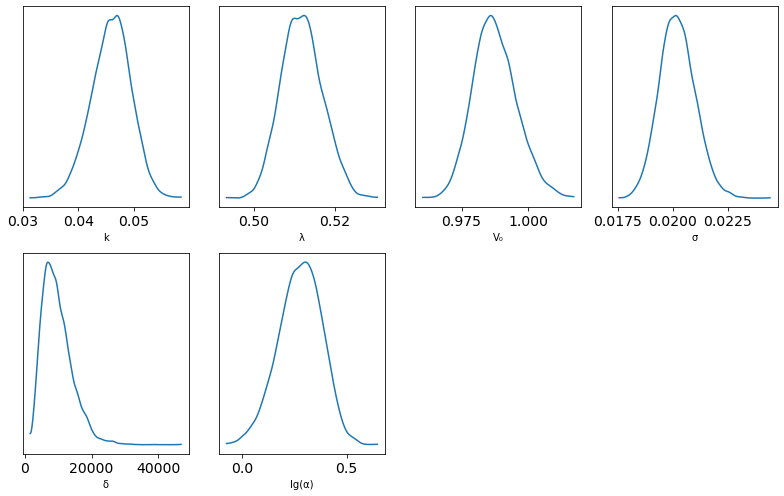

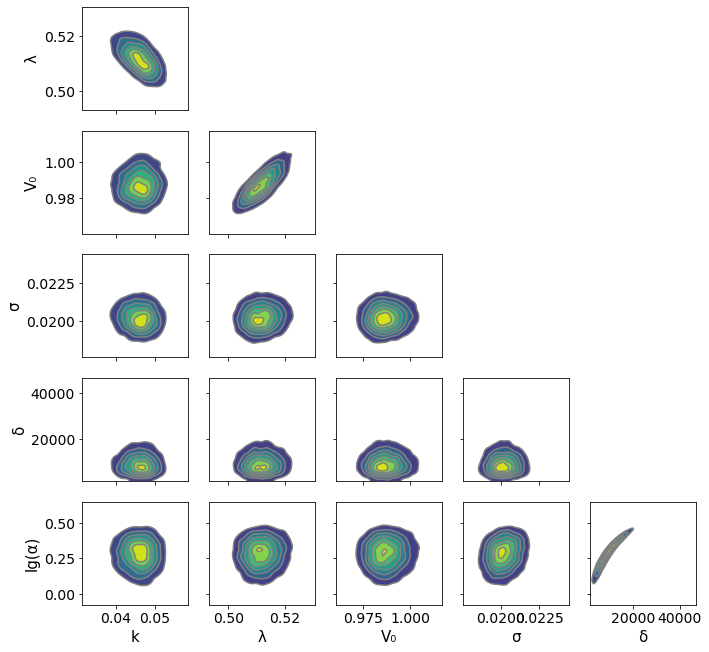

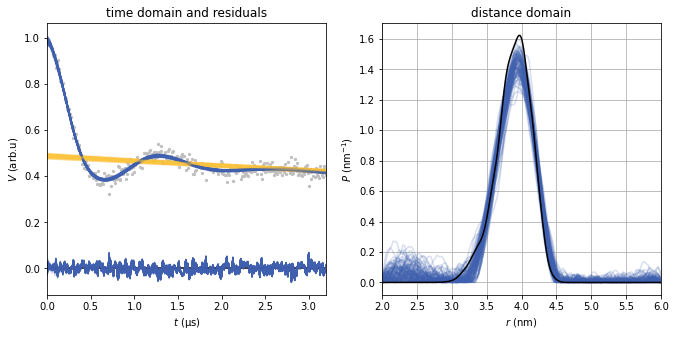

In [5]:
dive.summary(trace, model, Pid = Pid)  

## Single Gaussian

In [6]:
pars_gauss = {"method": 'gaussian', "r": np.linspace(2,6,200), 'nGauss': 1}

model_gauss = dive.model(t, Vexp, pars_gauss)

MCMCparameters = {"draws": 2000,"tune": 500, "chains": 4, 'cores': 4}
trace_gauss = dive.sample(model_gauss,MCMCparameters)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, V0, lamb, k, w, r0_rel]


Sampling 4 chains for 500 tune and 2_000 draw iterations (2_000 + 8_000 draws total) took 128 seconds.
The acceptance probability does not match the target. It is 0.8993680359555631, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8970760178195819, but should be close to 0.8. Try to increase the number of tuning steps.


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
r0[0]  3.918  0.010   3.899    3.937        0.0      0.0    5624.0    5517.0   
w[0]   0.588  0.026   0.538    0.636        0.0      0.0    6272.0    5845.0   
k      0.050  0.003   0.044    0.055        0.0      0.0    5864.0    5315.0   
λ      0.499  0.004   0.492    0.506        0.0      0.0    4130.0    4484.0   
V₀     0.970  0.005   0.960    0.980        0.0      0.0    5121.0    5120.0   
σ      0.020  0.001   0.019    0.022        0.0      0.0    6241.0    5333.0   

       r_hat  
r0[0]    1.0  
w[0]     1.0  
k        1.0  
λ        1.0  
V₀       1.0  
σ        1.0

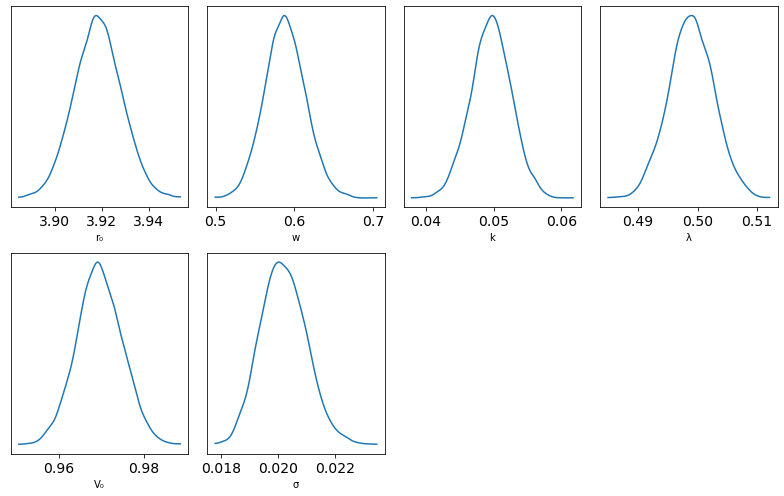

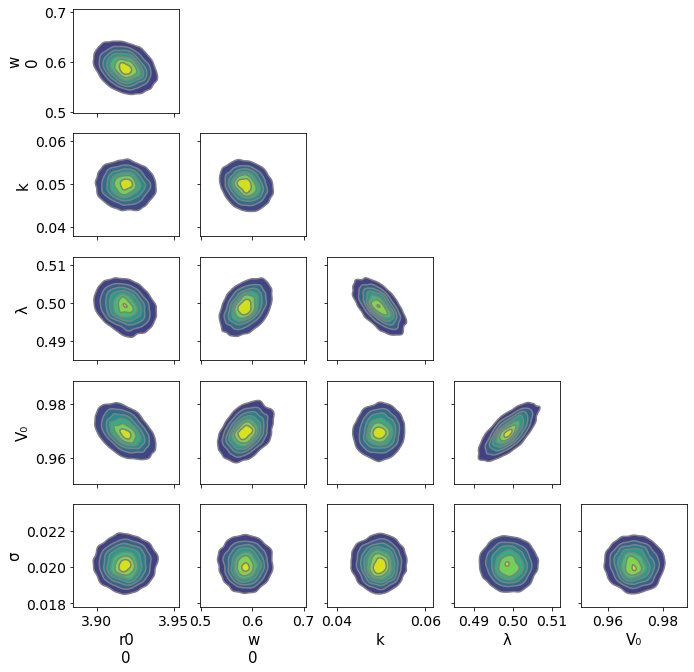

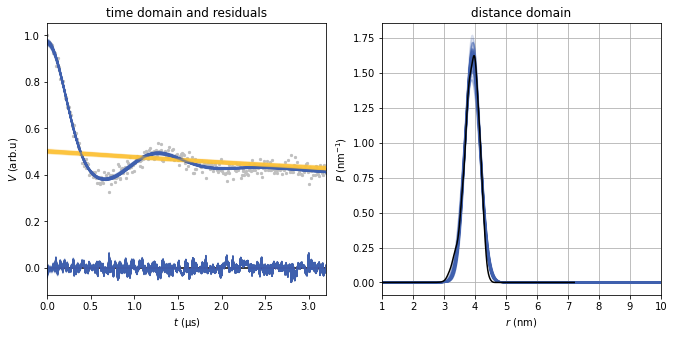

In [7]:
dive.summary(trace_gauss, model_gauss, Pid = Pid)  